In [2]:
import geopandas as gpd
import geoplot
from shapely.ops import unary_union
import shapely
import pypsa
import matplotlib.pyplot as plt
plt.style.use("bmh")
%matplotlib inline

In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Circle, Ellipse
from matplotlib.legend_handler import HandlerPatch
to_rgba = mpl.colors.colorConverter.to_rgba

In [54]:
def plot_map(n, ax=None, attribute='p_nom',opts={}):
    if ax is None:
        ax = plt.gca()

    ## DATA
    line_colors = {'cur': "purple",
                   'exp': mpl.colors.rgb2hex(to_rgba("red", 0.7), True)}
    tech_colors = opts['tech_colors']

    if attribute == 'p_nom':
        # bus_sizes = n.generators_t.p.sum().loc[n.generators.carrier == "load"].groupby(n.generators.bus).sum()
        bus_sizes = pd.concat((n.generators.query('carrier != "load"').groupby(['bus', 'carrier']).p_nom_opt.sum(),
                               n.storage_units.groupby(['bus', 'carrier']).p_nom_opt.sum()))
        line_widths_exp = n.lines.s_nom_opt
        line_widths_cur = n.lines.s_nom_min
        link_widths_exp = n.links.p_nom_opt
        link_widths_cur = n.links.p_nom_min
    else:
        raise 'plotting of {} has not been implemented yet'.format(attribute)


    line_colors_with_alpha = \
        ((line_widths_cur / n.lines.s_nom > 1e-3)
         .map({True: line_colors['cur'], False: to_rgba(line_colors['cur'], 0.)}))
    link_colors_with_alpha = \
        ((link_widths_cur / n.links.p_nom > 1e-3)
        .map({True: line_colors['cur'], False: to_rgba(line_colors['cur'], 0.)}))
    

    ## FORMAT
    linewidth_factor = opts['map'][attribute]['linewidth_factor']
    bus_size_factor  = opts['map'][attribute]['bus_size_factor']

    ## PLOT
    n.plot(line_widths=line_widths_exp/linewidth_factor,
           link_widths=link_widths_exp/linewidth_factor,
           line_colors=line_colors['exp'],
           link_colors=line_colors['exp'],
           bus_sizes=bus_sizes/bus_size_factor,
           bus_colors=tech_colors,
           boundaries=map_boundaries,
           color_geomap=True, geomap=True,
           ax=ax)
    n.plot(line_widths=line_widths_cur/linewidth_factor,
           link_widths=link_widths_cur/linewidth_factor,
           line_colors=line_colors_with_alpha,
           link_colors=link_colors_with_alpha,
           bus_sizes=0,
           boundaries=map_boundaries,
           color_geomap=True, geomap=False,
           ax=ax)
    ax.set_aspect('equal')
    ax.axis('off')

    # Rasterize basemap
    # TODO : Check if this also works with cartopy
    for c in ax.collections[:2]: c.set_rasterized(True)

    # LEGEND
    handles = []
    labels = []

    for s in (10, 1):
        handles.append(plt.Line2D([0],[0],color=line_colors['exp'],
                                linewidth=s*1e3/linewidth_factor))
        labels.append("{} GW".format(s))
    l1_1 = ax.legend(handles, labels,
                     loc="upper left", bbox_to_anchor=(0.24, 1.01),
                     frameon=False,
                     labelspacing=0.8, handletextpad=1.5,
                     title='Transmission Exp./Exist.             ')
    ax.add_artist(l1_1)

    handles = []
    labels = []
    for s in (10, 5):
        handles.append(plt.Line2D([0],[0],color=line_colors['cur'],
                                linewidth=s*1e3/linewidth_factor))
        labels.append("/")
    l1_2 = ax.legend(handles, labels,
                loc="upper left", bbox_to_anchor=(0.26, 1.01),
                frameon=False,
                labelspacing=0.8, handletextpad=0.5,
                title=' ')
    ax.add_artist(l1_2)

    handles = make_legend_circles_for([10e3, 5e3, 1e3], scale=bus_size_factor, facecolor="w")
    labels = ["{} GW".format(s) for s in (10, 5, 3)]
    l2 = ax.legend(handles, labels,
                loc="upper left", bbox_to_anchor=(0.01, 1.01),
                frameon=False, labelspacing=1.0,
                title='Generation',
                handler_map=make_handler_map_to_scale_circles_as_in(ax))
    ax.add_artist(l2)

    techs =  (bus_sizes.index.levels[1]).intersection(pd.Index(opts['vre_techs'] + opts['conv_techs'] + opts['storage_techs']))
    handles = []
    labels = []
    for t in techs:
        handles.append(plt.Line2D([0], [0], color=tech_colors[t], marker='o', markersize=8, linewidth=0))
        labels.append(opts['nice_names'].get(t, t))
    l3 = ax.legend(handles, labels, loc="upper center",  bbox_to_anchor=(0.5, -0.), # bbox_to_anchor=(0.72, -0.05),
                handletextpad=0., columnspacing=0.5, ncol=4, title='Technology')

    return fig

In [66]:
from ruamel.yaml import YAML
yaml = YAML(typ='safe')
config = yaml.load("config.yaml",)

ModuleNotFoundError: No module named 'ruamel'

In [12]:
countries = gpd.read_file("resources/country_shapes.geojson")
countries_elec = gpd.read_file("resources/country_shapes.geojson")
europe = gpd.read_file("resources/europe_shape.geojson")
ren_zones = gpd.read_file("resources/renewable_shapes.geojson")

<AxesSubplot:>

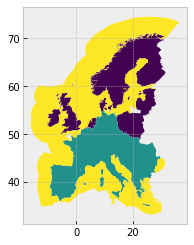

In [3]:
ren_zones.plot(column = "index")

In [3]:
n1 = pypsa.Network("networks/elec_s_37_a.nc")
n4 = pypsa.Network("networks/elec_s.nc")
n5 = pypsa.Network("networks/base.nc")

INFO:pypsa.io:Imported network elec_s_37_a.nc has buses, carriers, generators, lines, links, loads, storage_units
INFO:pypsa.io:Imported network elec_s.nc has buses, carriers, generators, lines, links, loads, storage_units
INFO:pypsa.io:Imported network base.nc has buses, lines, links, transformers


In [1]:
n = n1
fig, ax = plt.subplots(figsize=(8,6))
n.plot_map(ax)
#plt.savefig(f"network_{n.buses.shape[0]} nodes")

NameError: name 'n1' is not defined

In [53]:
fig, ax = plt.subplots(figsize=(10,6), subplot_kw={"projection": ccrs.PlateCarree()})

NameError: name 'ccrs' is not defined

AttributeError: 'AxesSubplot' object has no attribute 'show'

In [57]:
clustered_zones = gpd.read_file("resources/regions_onshore_elec_s_12.geojson")
clustered_zones_c = gpd.read_file("resources/regions_onshore_elec_s_37.geojson")
clustered_zones_r = gpd.read_file("resources/regions_onshore_elec_s_30.geojson")

In [39]:
clustered_zones

,name,geometry
0,Ren_01 0,"MULTIPOLYGON (((28.83181 45.32230, 28.92989 45..."
1,Ren_06 0,"POLYGON ((23.03211 54.30955, 23.04162 54.34097..."
2,Ren_101 0,"MULTIPOLYGON (((23.51250 52.12444, 23.57937 52..."
3,Ren_102 0,"MULTIPOLYGON (((24.86883 60.17975, 24.84246 60..."
4,Ren_106 0,"POLYGON ((24.25705 53.89402, 24.22915 53.93237..."
5,Ren_11 0,"MULTIPOLYGON (((-5.71312 36.05996, -5.79605 36..."
6,Ren_111 0,"MULTIPOLYGON (((9.73097 54.99543, 9.76319 54.9..."
7,Ren_112 0,"MULTIPOLYGON (((7.15553 58.05028, 7.08277 58.0..."
8,Ren_121 0,"MULTIPOLYGON (((14.03745 53.75528, 14.18653 53..."
9,Ren_122 0,"MULTIPOLYGON (((14.33991 55.50421, 14.31833 55..."


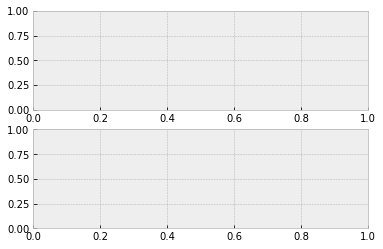

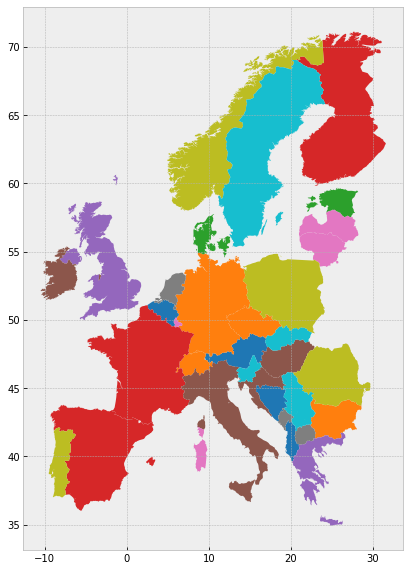

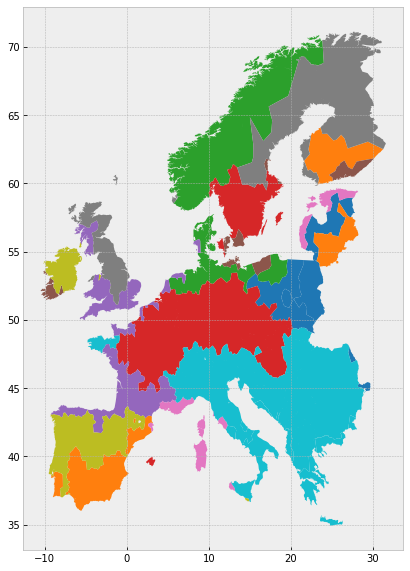

In [65]:
fig, axs = plt.subplots(2)
axs[0] = clustered_zones_c.plot(figsize=(20,10),column = "name")
plt.savefig("clusterd_regions_countries.png",edgecolor = "black")
axs[1] = clustered_zones_r.plot(figsize=(20,10),column = "name")
plt.savefig("clusterd_regions_renewable.png",edgecolor = "black")